In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import wordcloud
import jieba

In [3]:
Text = r"Every year as the clock nears midnight on December 31, the eyes of the world turn once more to the dazzling lights and bustling energy of Times Square. Anticipation runs high. New Year's Eve at the symbolic center of New York City has become more than just a celebration — it\'s a global tradition.The world holds its breath, and cheers as the clocks strike twelve.As the famous New Year's Eve Ball descends atop One Times Square, countless people watch Times Square, nationwide, and throughout the world and are united in bidding collective farewell to the departing year and expressing joy and hope for the year ahead."

seg_list = jieba.cut(Text, cut_all=False)
print('generator: ',seg_list)
for seg in seg_list:
    print(seg,end=' ')
print('')
seg_list = jieba.lcut(Text, cut_all=False)
print('list: ',seg_list)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ericn\AppData\Local\Temp\jieba.cache


generator:  <generator object Tokenizer.cut at 0x0000025947701348>


Loading model cost 1.106 seconds.
Prefix dict has been built successfully.


Every   year   as   the   clock   nears   midnight   on   December   31 ,   the   eyes   of   the   world   turn   once   more   to   the   dazzling   lights   and   bustling   energy   of   Times   Square .   Anticipation   runs   high .   New   Year ' s   Eve   at   the   symbolic   center   of   New   York   City   has   become   more   than   just   a   celebration   —   it \ ' s   a   global   tradition . The   world   holds   its   breath ,   and   cheers   as   the   clocks   strike   twelve . As   the   famous   New   Year ' s   Eve   Ball   descends   atop   One   Times   Square ,   countless   people   watch   Times   Square ,   nationwide ,   and   throughout   the   world   and   are   united   in   bidding   collective   farewell   to   the   departing   year   and   expressing   joy   and   hope   for   the   year   ahead . 
list:  ['Every', ' ', 'year', ' ', 'as', ' ', 'the', ' ', 'clock', ' ', 'nears', ' ', 'midnight', ' ', 'on', ' ', 'December', ' ', '31', ',', ' ', 't

In [4]:
def remove_stop_words(file_name,seg_list):
    with open(file_name,'r', errors='ignore') as f:
        stop_words = f.readlines()

    stop_words = [stop_word.rstrip() for stop_word in stop_words]
    stop_words.append(' ')
    
    new_list = []
    
    for seg in seg_list:
        #if seg not in (stop_words and [' ']):
        if seg not in (stop_words):
            new_list.append(seg) 
    return new_list
file_name = 'stop_using_words_Eng.txt'
seg_list = remove_stop_words(file_name,seg_list)
print('remove_stop_words: ',seg_list)

remove_stop_words:  ['Every', 'year', 'as', 'clock', 'nears', 'midnight', 'on', 'December', '31', 'eyes', 'world', 'turn', 'once', 'more', 'to', 'dazzling', 'lights', 'bustling', 'energy', 'Times', 'Square', 'Anticipation', 'runs', 'high', 'New', 'Year', 'Eve', 'at', 'symbolic', 'center', 'New', 'York', 'City', 'has', 'become', 'more', 'than', 'just', 'celebration', '—', 'it', 'global', 'tradition', 'The', 'world', 'holds', 'its', 'breath', 'cheers', 'as', 'clocks', 'strike', 'twelve', 'As', 'famous', 'New', 'Year', 'Eve', 'Ball', 'descends', 'atop', 'One', 'Times', 'Square', 'countless', 'people', 'watch', 'Times', 'Square', 'nationwide', 'throughout', 'world', 'are', 'united', 'in', 'bidding', 'collective', 'farewell', 'to', 'departing', 'year', 'expressing', 'joy', 'hope', 'for', 'year', 'ahead']


In [5]:
# count the number of words
import pandas as pd
def count_segment_freq(seg_list):
    seg_df = pd.DataFrame(seg_list,columns=['seg'])
    seg_df['count'] = 1
    sef_freq = seg_df.groupby('seg')['count'].sum().sort_values(ascending=False)
    sef_freq = pd.DataFrame(sef_freq)
    return sef_freq

sef_freq = count_segment_freq(seg_list)
sef_freq.head()


,count
seg,
New,3
world,3
year,3
Times,3
Square,3


(-0.5, 399.5, 199.5, -0.5)

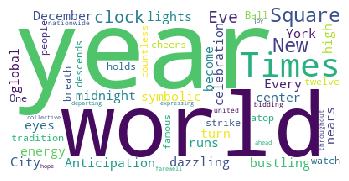

In [6]:
from wordcloud import WordCloud
seg_list=' '.join(seg_list)

wc = WordCloud(background_color='white')
wc.generate(seg_list)
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis("off")


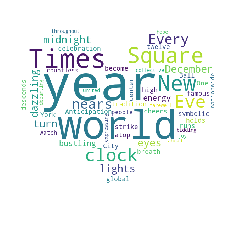

In [7]:
import imageio
back_color = imageio.imread('pink-heart.jpg')
wc = WordCloud(background_color='white',mask=back_color)
wc.generate(seg_list)
plt.imshow(wc)
plt.axis('off')
plt.show()

## reference:
https://medium.com/@fsflyingsoar/%E7%AD%86%E8%A8%98-for-python-jieba-wordcloud-b814f5e04e01